In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Read Data

In [2]:
file = r'C:\Users\Joel\Dropbox\Institute of Data\IOD Class Work\capstone\data\Option 2 - Police Force Strength\use_of_force.csv'
data = pd.read_csv(file)
data.head()

,IncidentDate,IncidentTime,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,...,SubjectInjured,SubjectNatureOfInjury,SubjectMedOffered,SubjectMedProvided,Outcome: Made off/escaped,Outcome: Arrested,Outcome: Hospitalised,Outcome: Detained - Mental Health Act,Outcome: Fatality,Outcome: Other
0,2020-04-01,00:12:00,Yes,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,No
1,2020-04-01,01:30:00,Yes,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,Yes
2,2020-04-01,03:30:00,No,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,No
3,2020-04-01,04:25:00,No,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,No,No,No,No,Yes
4,2020-04-01,04:12:00,No,No,No,No,No,No,No,No,...,No,NaN,NaN,NaN,No,Yes,No,No,No,No


In [3]:
for i in data.columns:
    print(i)

IncidentDate
IncidentTime
Incident Location: Street/Highway
Incident Location: Public Transport
Incident Location: Retail Premises
Incident Location: Open ground (e.g. park, car park, field)
Incident Location: Licensed Premises
Incident Location: Sports or Event Stadia
Incident Location: Hospital/A&E (non-mental-health setting)
Incident Location: Mental Health Setting
Incident Location: Police vehicle with prisoner handling cage
Incident Location: Police vehicle without prisoner handling cage
Incident Location: Dwelling
Incident Location: Police station (excluding custody block)
Incident Location: Custody Block
Incident Location: Ambulance
Incident Location: Other
Borough
PrimaryConduct
AssaultedBySubject
ThreatenedWithWeapon
AssaultedWithWeapon
Impact Factor: Possesion of a weapon
Impact Factor: Alcohol
Impact Factor: Drugs
Impact Factor: Mental Health
Impact Factor: Prior Knowledge
Impact Factor: Size/Gender/Build
Impact Factor: Acute Behavioural Disorder
Impact Factor: Crowd
Impact 

In [4]:
locations = data[['Incident Location: Street/Highway',
'Incident Location: Public Transport',
'Incident Location: Retail Premises',
'Incident Location: Open ground (e.g. park, car park, field)',
'Incident Location: Licensed Premises',
'Incident Location: Sports or Event Stadia',
'Incident Location: Hospital/A&E (non-mental-health setting)',
'Incident Location: Mental Health Setting',
'Incident Location: Police vehicle with prisoner handling cage',
'Incident Location: Police vehicle without prisoner handling cage',
'Incident Location: Dwelling',
'Incident Location: Police station (excluding custody block)',
'Incident Location: Custody Block',
'Incident Location: Ambulance',
'Incident Location: Other']]
locations.head()

,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,Incident Location: Police vehicle with prisoner handling cage,Incident Location: Police vehicle without prisoner handling cage,Incident Location: Dwelling,Incident Location: Police station (excluding custody block),Incident Location: Custody Block,Incident Location: Ambulance,Incident Location: Other
0,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No
3,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No
4,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No


In [5]:
# Map 1 and 0 to yes and no
for i in locations.columns:
    locations[i] = locations[i].map({'Yes': 1, 'No': 0})
locations.head()

,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,Incident Location: Police vehicle with prisoner handling cage,Incident Location: Police vehicle without prisoner handling cage,Incident Location: Dwelling,Incident Location: Police station (excluding custody block),Incident Location: Custody Block,Incident Location: Ambulance,Incident Location: Other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
for i in locations.columns:
    print(locations[i].value_counts())

1    85577
0    62318
Name: Incident Location: Street/Highway, dtype: int64
0    146512
1      1383
Name: Incident Location: Public Transport, dtype: int64
0    145031
1      2864
Name: Incident Location: Retail Premises, dtype: int64
0    141897
1      5998
Name: Incident Location: Open ground (e.g. park, car park, field), dtype: int64
0    147459
1       436
Name: Incident Location: Licensed Premises, dtype: int64
0    147868
1        27
Name: Incident Location: Sports or Event Stadia, dtype: int64
0    145262
1      2633
Name: Incident Location: Hospital/A&E (non-mental-health setting), dtype: int64
0    147278
1       617
Name: Incident Location: Mental Health Setting, dtype: int64
0    147542
1       353
Name: Incident Location: Police vehicle with prisoner handling cage, dtype: int64
0    147638
1       257
Name: Incident Location: Police vehicle without prisoner handling cage, dtype: int64
0    116683
1     31212
Name: Incident Location: Dwelling, dtype: int64
0    145290
1     

In [7]:
# Check totals match up
total = 85577 + 1383 + 2864 + 5998 + 436 + 27 + 2633 + 617 +353 + 257 +31212 + 2605 + 8974 + 459 + 4500
print(total)
print(locations.shape)

147895
(147895, 15)


In [8]:
locations_transposed = locations.T
locations_transposed['total'] = locations_transposed.sum(axis =1)
location_counts = locations_transposed.iloc[:, -1]

In [9]:
location_counts = pd.DataFrame(location_counts)
location_counts.reset_index(level=0, inplace = True)
location_counts.rename(columns = {'index':'Locations'}, inplace = True)
location_counts

,Locations,total
0,Incident Location: Street/Highway,85577
1,Incident Location: Public Transport,1383
2,Incident Location: Retail Premises,2864
3,"Incident Location: Open ground (e.g. park, car...",5998
4,Incident Location: Licensed Premises,436
5,Incident Location: Sports or Event Stadia,27
6,Incident Location: Hospital/A&E (non-mental-he...,2633
7,Incident Location: Mental Health Setting,617
8,Incident Location: Police vehicle with prisone...,353
9,Incident Location: Police vehicle without pris...,257


In [10]:
loc_short = ['Street/Highway',
            'Public Transport', 
            'Retail Premesis',
            'Open Ground (e.g. park)',
            'Lisenced Premesis',
            'Sports or Events Stadia',
            'Hospital/A&E (non-mental-health)',
            'Mental Health Setting',
            'Police Vehicle w/ handling cage',
            'Police Vehicle w/o handling cage',
            'Dwelling',
            'Police Station (not custody block)',
            'Custody Block',
            'Ambulance',
            'Other']
location_counts['LocationShort'] = loc_short

In [11]:
location_counts.sort_values(by='total', ascending=False, inplace = True)
location_counts.drop(['Locations'], axis = 1, inplace = True)
location_counts

,total,LocationShort
0,85577,Street/Highway
10,31212,Dwelling
12,8974,Custody Block
3,5998,Open Ground (e.g. park)
14,4500,Other
2,2864,Retail Premesis
6,2633,Hospital/A&E (non-mental-health)
11,2605,Police Station (not custody block)
1,1383,Public Transport
7,617,Mental Health Setting


In [30]:
# Pie chart visualization data
totals = [88577,
            31212,
            8974,
            5998,
            4500,
            2864,
            5770]
locs = ['Street/Highway', 'Dwelling', 'Custody Block', 'Open Ground', 'Other','Retail Premesis',  'Remaining Categories Total']
piechart = pd.DataFrame(data = locs)
piechart['totals'] = totals
piechart.rename(columns = {0:'Locations'}, inplace = True)
piechart.head()

,Locations,totals
0,Street/Highway,88577
1,Dwelling,31212
2,Custody Block,8974
3,Open Ground,5998
4,Other,4500


# Visualization

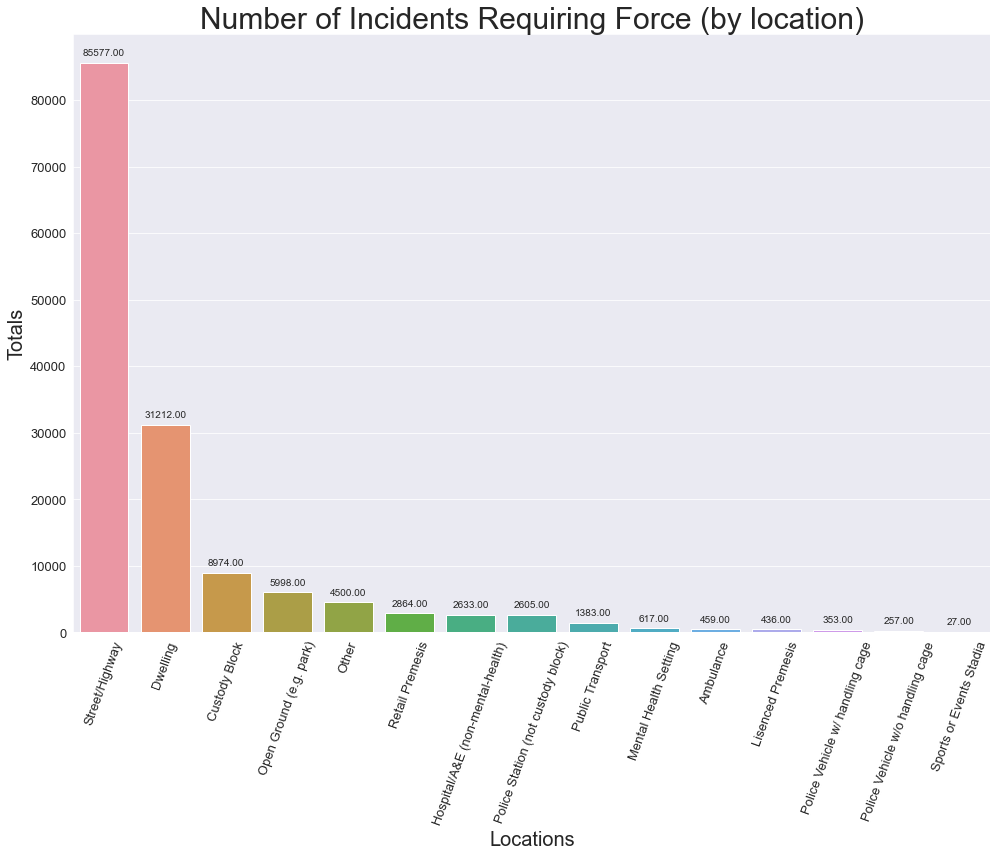

In [24]:
plt.figure(figsize=(14,12))
ax = sns.set_style('darkgrid')
ax = sns.barplot(x = location_counts['LocationShort'], y = location_counts['total'])
ax.set_xlabel('Locations', fontsize = 20)
ax.set_ylabel('Totals', fontsize = 20)
ax.axes.set_title('Number of Incidents Requiring Force (by location)', fontsize = 30)
plt.xticks(rotation = 70)
plt.tick_params(labelsize = 13)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha =           'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.tight_layout()

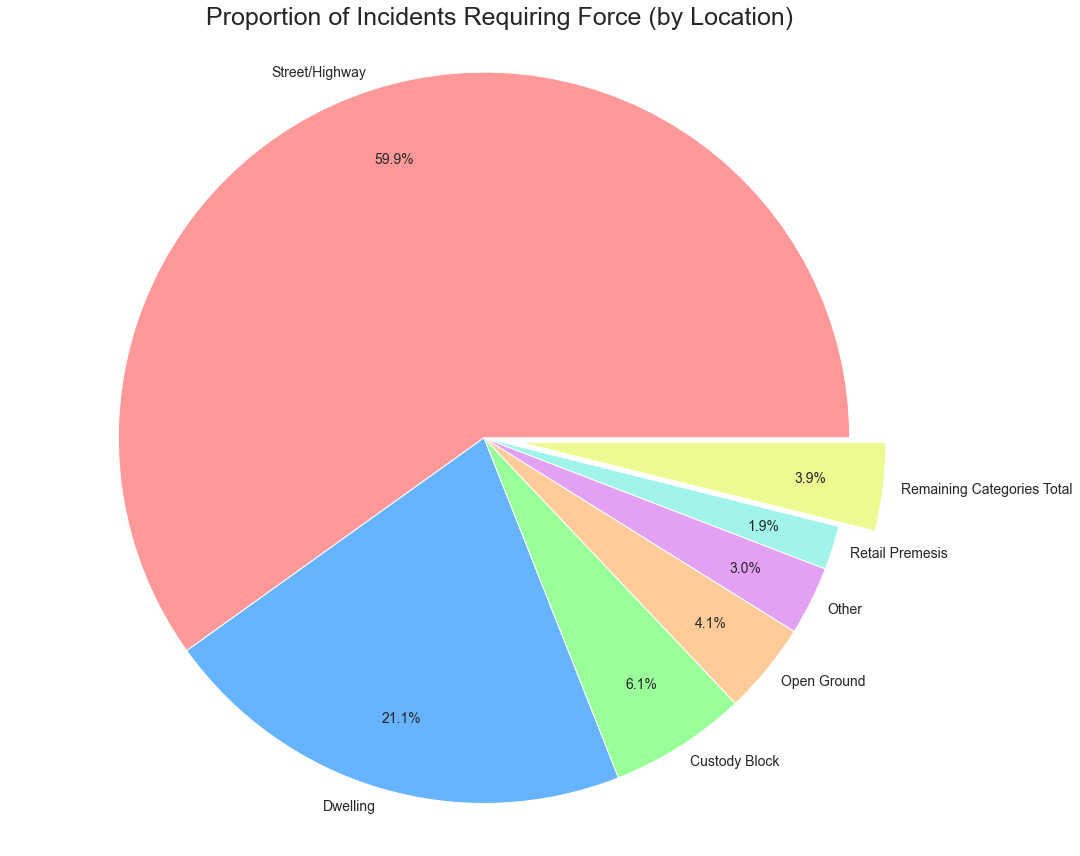

In [65]:
# Pie chart
pie, ax = plt.subplots(figsize = (15, 12))
labels = piechart['Locations']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#e3a1f4', '#a1f4ea', '#edf991']
plt.pie(x = piechart['totals'], autopct="%.1f%%", explode=(0, 0, 0, 0, 0, 0, .05), labels=labels, pctdistance=0.8, colors = colors, labeldistance = 1.05, textprops = {'fontsize': 14}, radius = 0.5)
plt.title("Proportion of Incidents Requiring Force (by Location)", fontsize=25)
ax.axis('equal')
plt.tight_layout()